In [1]:
from fastai.text.all import *

In [2]:
#!pip install fastai

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import re
import string
import nltk
import tensorflow as tf
from time import time
# import Tokenizer method from nltk
from nltk.tokenize import TweetTokenizer,word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer

In [150]:
#load the Coronavirus data
data_tweets = pd.read_csv('C://Users//Naveena//Documents//EmotionAnalysis_DataSet/text-query-tweets_75k.csv')
data_tweets.head()
#cor_tweets.dtypes

,Datetime,Tweet Id,Place,Text,Username,FollowersCount,FriendsCount,Language,Hashtag,Retweet Count,Likes Count
0,2021-05-31 23:57:57+00:00,1399515526783774728,East Coast USA,"In its most-recent guidance updated last December, the Equal Employment Opportunity Commission said that employers can legally require workers to be vaccinated against the coronavirus, https://t.co/vbmZKTVS9T",WSeparates,5059,5552,en,NaN,0,0
1,2021-05-31 23:41:40+00:00,1399511428613111808,Australia,‘A dog’s breakfast’: where the Aust Govt went wrong with its aged care Covid response.\n\nVic’s latest outbreak exposes failure to fully protect Fed run aged care homes as woman who lost both parents to coronavirus adds to criticism of vaccination strategy. https://t.co/lrRUsWHohP,MSMWatchdog2013,20247,21540,en,NaN,1,5
2,2021-05-31 23:40:00+00:00,1399511006284378113,San Francisco,"Californians headed to campgrounds, beaches and restaurants over the long holiday weekend as the state prepared to shed some of its coronavirus rules.\nhttps://t.co/YU2nR3qsld",KCBSRadio,49198,4446,en,NaN,3,9
3,2021-05-31 23:31:00+00:00,1399508741393944581,"Pittsburgh, PA","Pennsylvania has lifted nearly all of its coronavirus restrictions, leading to this Memorial Day resembling those of the years past.\n https://t.co/uSUolht5qm",KDKA,198336,284,en,NaN,1,12
4,2021-05-31 23:28:34+00:00,1399508128954081281,"Sydney, New South Wales",Why can't #Japan just cancel the games? Tokyo has kept a tentative grip on its coronavirus outbreak. But the #olympics2021 could change everything! https://t.co/1iGWoLFOAX,abcmatt,6740,558,en,"['Japan', 'olympics2021']",0,2


In [151]:
cor_tweets=data_tweets
cor_tweets.head()

,Datetime,Tweet Id,Place,Text,Username,FollowersCount,FriendsCount,Language,Hashtag,Retweet Count,Likes Count
0,2021-05-31 23:57:57+00:00,1399515526783774728,East Coast USA,"In its most-recent guidance updated last December, the Equal Employment Opportunity Commission said that employers can legally require workers to be vaccinated against the coronavirus, https://t.co/vbmZKTVS9T",WSeparates,5059,5552,en,NaN,0,0
1,2021-05-31 23:41:40+00:00,1399511428613111808,Australia,‘A dog’s breakfast’: where the Aust Govt went wrong with its aged care Covid response.\n\nVic’s latest outbreak exposes failure to fully protect Fed run aged care homes as woman who lost both parents to coronavirus adds to criticism of vaccination strategy. https://t.co/lrRUsWHohP,MSMWatchdog2013,20247,21540,en,NaN,1,5
2,2021-05-31 23:40:00+00:00,1399511006284378113,San Francisco,"Californians headed to campgrounds, beaches and restaurants over the long holiday weekend as the state prepared to shed some of its coronavirus rules.\nhttps://t.co/YU2nR3qsld",KCBSRadio,49198,4446,en,NaN,3,9
3,2021-05-31 23:31:00+00:00,1399508741393944581,"Pittsburgh, PA","Pennsylvania has lifted nearly all of its coronavirus restrictions, leading to this Memorial Day resembling those of the years past.\n https://t.co/uSUolht5qm",KDKA,198336,284,en,NaN,1,12
4,2021-05-31 23:28:34+00:00,1399508128954081281,"Sydney, New South Wales",Why can't #Japan just cancel the games? Tokyo has kept a tentative grip on its coronavirus outbreak. But the #olympics2021 could change everything! https://t.co/1iGWoLFOAX,abcmatt,6740,558,en,"['Japan', 'olympics2021']",0,2


In [5]:
#Import the crowdflower emotion dataset
tweets = pd.read_csv("EmotionDataSet.csv")
tweets.head()

,tweet_id,sentiment,author,content
0,1957083641,anger,elDi_irk,fuckin'm transtelecom
1,1957089935,anger,umi78,Working But it's Fridaaaayyyyy
2,1957110088,anger,NayNay_Rt,Packing I don't like it..
3,1957289252,anger,crazy_erin,I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang.
4,1957291305,anger,msfussybritches,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo


In [6]:
tweets = tweets.rename(columns={"content": "text", "sentiment": "emotion"})
tweets.head()

,tweet_id,emotion,author,text
0,1957083641,anger,elDi_irk,fuckin'm transtelecom
1,1957089935,anger,umi78,Working But it's Fridaaaayyyyy
2,1957110088,anger,NayNay_Rt,Packing I don't like it..
3,1957289252,anger,crazy_erin,I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang.
4,1957291305,anger,msfussybritches,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo


In [7]:
tweets = tweets.reindex(columns=['text','emotion'])

In [8]:
tweets

,text,emotion
0,fuckin'm transtelecom,anger
1,Working But it's Fridaaaayyyyy,anger
2,Packing I don't like it..,anger
3,I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang.,anger
4,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo,anger
...,...,...
875,My tongue still hurts. I need to sleep!!!,worry
876,needs a little lie down. not feeling great today. boo,worry
877,"its from all that anal sex, i forgot the lube. damn may need to go to the E.R.",worry
878,Playn madden with austin. Im going to miss him..,worry


In [9]:
cor_tweets['Text'].astype('str').value_counts()

In its July 2020 report on #Yemen's situation : the @WorldBank stated that the fuel crisis caused by US-Saudi blockade continued with no improvement, disrupting basic services, facing #Coronavirus efforts and humanitarian operations activities  #USADetainsOilShips               432
Yoga guru Ramdev-run Patanjali has claimed that its Ayurvedic medicine 'Coronil' can help cure COVID-19 caused by the novel coronavirus.\n#Patanjalis_EvidenceBased_Medicine4Corona\n\n#PatanjaliCoronil                                                                               159
SARS-CoV-2, the coronavirus which causes COVID-19, does not care whether or not we are weary of this global pandemic.\n\nIts only objective is to survive by finding a host and replicating.\n\nCoronavirus Dashboard: https://t.co/M1DKt1vBeF                                          63
Covid is likely to persist once its pandemic phase has passed and circulate each winter alongside the flu. Even after more of us contract coronavirus i

In [10]:
text= cor_tweets.Text

In [11]:
def clean_text(df):
    all_tweets = list()
    lines = cor_tweets["Text"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        text = re.sub(r"kind'a", "kind of", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_tweets.append(words)
    return all_tweets

all_tweets = clean_text(cor_tweets.Text)
all_tweets[0:20]

['mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus',
 'dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy',
 'californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules',
 'pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past',
 'not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything',
 'victoria reported three new locally acquired coronavirus cases taking state outbreak casesa total nine local cases recorded monday included six flagged government daily press conference yesterday',
 'mr sylvester head housing options bristol city council said homelessness surged lockdown biggest rise third coronavirus took toll fam

In [12]:
cor_tweets['text'] = all_tweets
cor_tweets.head()

,Datetime,Tweet Id,Place,Text,Username,FollowersCount,FriendsCount,Language,Hashtag,Retweet Count,Likes Count,text
0,2021-05-31 23:57:57+00:00,1399515526783774728,East Coast USA,"In its most-recent guidance updated last December, the Equal Employment Opportunity Commission said that employers can legally require workers to be vaccinated against the coronavirus, https://t.co/vbmZKTVS9T",WSeparates,5059,5552,en,NaN,0,0,mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus
1,2021-05-31 23:41:40+00:00,1399511428613111808,Australia,‘A dog’s breakfast’: where the Aust Govt went wrong with its aged care Covid response.\n\nVic’s latest outbreak exposes failure to fully protect Fed run aged care homes as woman who lost both parents to coronavirus adds to criticism of vaccination strategy. https://t.co/lrRUsWHohP,MSMWatchdog2013,20247,21540,en,NaN,1,5,dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy
2,2021-05-31 23:40:00+00:00,1399511006284378113,San Francisco,"Californians headed to campgrounds, beaches and restaurants over the long holiday weekend as the state prepared to shed some of its coronavirus rules.\nhttps://t.co/YU2nR3qsld",KCBSRadio,49198,4446,en,NaN,3,9,californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules
3,2021-05-31 23:31:00+00:00,1399508741393944581,"Pittsburgh, PA","Pennsylvania has lifted nearly all of its coronavirus restrictions, leading to this Memorial Day resembling those of the years past.\n https://t.co/uSUolht5qm",KDKA,198336,284,en,NaN,1,12,pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past
4,2021-05-31 23:28:34+00:00,1399508128954081281,"Sydney, New South Wales",Why can't #Japan just cancel the games? Tokyo has kept a tentative grip on its coronavirus outbreak. But the #olympics2021 could change everything! https://t.co/1iGWoLFOAX,abcmatt,6740,558,en,"['Japan', 'olympics2021']",0,2,not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything


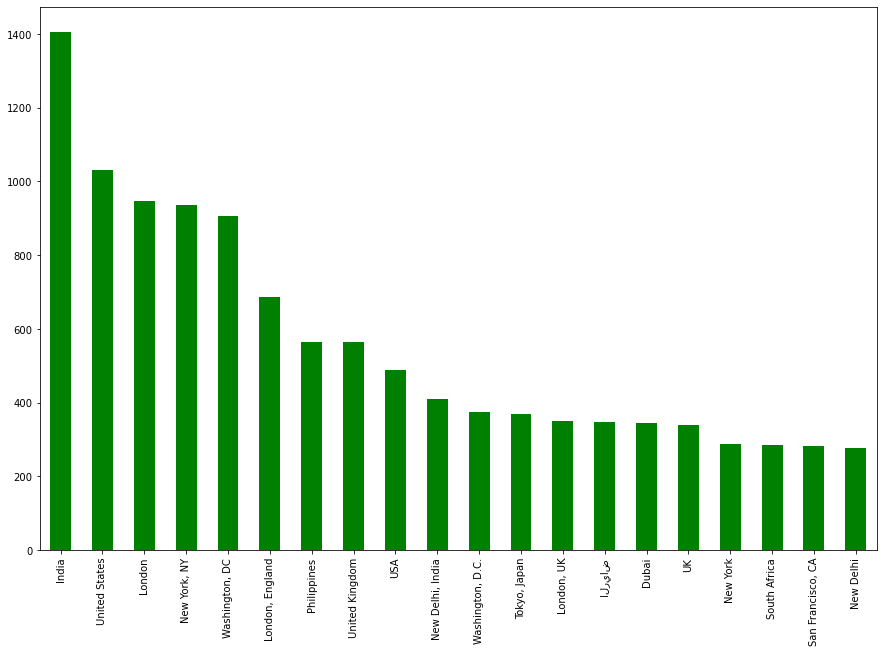

In [13]:
plt.figure(figsize=(15,10))
location_serie = cor_tweets['Place']
location_serie = location_serie.value_counts(dropna=True).nlargest(20)
location_serie.plot(kind ='bar', color='green')
plt.show()

In [14]:
cor_tweets = cor_tweets.reindex(columns=['text'])

In [15]:
cor_tweets

,text
0,mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus
1,dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy
2,californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules
3,pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past
4,not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything
...,...
75887,africa economy impacted sting africa far spared worst coronavirus pandemic terms cases deaths economy not lucky especially poorer smaller countries dependent single
75888,los angeles experiencing surge coronavirus cases mayor says city needs trained health workers vaccine doses counter spread
75889,controversial comments decisions islamic republic officials vaccine continue cuba helping iran develop coronavirus vaccine graphs irantruth
75890,associated press xi hails china economic growth despite pandemic setback thu december est beijing ap china made major progress developing economy eradicating rural poverty past year despite coronavirus


In [16]:
print(len(tweets))

880


In [17]:
# Clean the text data and combine the dfs
tweets = tweets[['text', 'emotion']]
cor_tweets['emotion'] = np.nan

df_lm = tweets[['text', 'emotion']].append(cor_tweets[['text', 'emotion']])
df_clas = df_lm.dropna(subset=['emotion'])
print(len(df_lm), len(df_clas))

76772 880


In [18]:
df_clas.head()

,text,emotion
0,fuckin'm transtelecom,anger
1,Working But it's Fridaaaayyyyy,anger
2,Packing I don't like it..,anger
3,I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang.,anger
4,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo,anger


In [19]:
df_clas.emotion.value_counts()

enthusiasm    110
hate          110
sadness       110
happiness     110
surprise      110
relief        110
anger         110
worry         110
Name: emotion, dtype: int64

In [20]:
#Training the language model
dls_lm = TextDataLoaders.from_df(df_lm, text_col='text', is_lm=True, valid_pct=0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\Naveena\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [21]:
dls_lm.show_batch(max_n=10)

,text,text_
0,xxbos nasuwt big question survey help gather crucial information difficulties faced teachers students families coronavirus pandemic impact upon education wellbeing xxbos xxunk biden administration supporting pfizer inc move begin exporting usmade doses coronavirus xxbos arizona department public health made additions website week including eligibility tracker seeking coronavirus vaccine xxbos crucially important piece interview remarkable xxunk xxunk key point thanks mom reminding climate change coronavirus problem shifting xxunk via xxunk xxbos update following,nasuwt big question survey help gather crucial information difficulties faced teachers students families coronavirus pandemic impact upon education wellbeing xxbos xxunk biden administration supporting pfizer inc move begin exporting usmade doses coronavirus xxbos arizona department public health made additions website week including eligibility tracker seeking coronavirus vaccine xxbos crucially important piece interview remarkable xxunk xxunk key point thanks mom reminding climate change coronavirus problem shifting xxunk via xxunk xxbos update following senate
1,cough xxunk standard coronavirus xxbos greece extended lockdown tightened restrictions areas country stem spread coronavirus pandemic surge new infections piled pressure health system authorities said xxbos total number global coronavirus cases topped million deaths surged million latest update johnshopkinsuniversity said current global caseload death toll stood respectively xxbos number bacolod residents willing get coronavirus vaccine increased city launched inoculation program among health workers early month councilor xxunk xxunk said visayasnews xxbos japanese,xxunk standard coronavirus xxbos greece extended lockdown tightened restrictions areas country stem spread coronavirus pandemic surge new infections piled pressure health system authorities said xxbos total number global coronavirus cases topped million deaths surged million latest update johnshopkinsuniversity said current global caseload death toll stood respectively xxbos number bacolod residents willing get coronavirus vaccine increased city launched inoculation program among health workers early month councilor xxunk xxunk said visayasnews xxbos japanese business
2,spending plan focused healthcare infrastructure monday government sought boost coronavirusravaged economy course biggest annual contraction record xxbos caesars puts pandemic losses wants insurers pay las vegas ap casino giant caesars entertainment inc putting losses coronavirus pandemic billion suing long list insurance carriers accuses xxunk xxbos uk medicines regulator hold joint briefing government vaccines advisory committee discuss concerns astrazeneca jab reported link blood clots follow live updates coronavirus blog xxbos use vaccine intention,plan focused healthcare infrastructure monday government sought boost coronavirusravaged economy course biggest annual contraction record xxbos caesars puts pandemic losses wants insurers pay las vegas ap casino giant caesars entertainment inc putting losses coronavirus pandemic billion suing long list insurance carriers accuses xxunk xxbos uk medicines regulator hold joint briefing government vaccines advisory committee discuss concerns astrazeneca jab reported link blood clots follow live updates coronavirus blog xxbos use vaccine intention immunity
3,new cases xxbos second wave wreaked havoc india thousands children lost one parents read article know state governments come forward help children article xxunk xxunk coronavirus xxbos xxunk coronavirus announcing time end worlds imam mahdi nasser mohammad alyemeni assuring brief news pfizer vaccine entire vaccines human physicians xxbos rwanda national carrier suspended flights south africa zimbabwe order contain spread new coronavirus variant xxbos cdc updated guidance say fully vaccinated people travel within,cases xxbos second wave wreaked havoc india thousands childr

In [22]:
#create a language model using language_model_learner
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.2, metrics=[accuracy, Perplexity()]).to_fp16()

C:\Users\Naveena\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(minimum=0.07585775852203369, steep=0.02754228748381138, valley=0.004365158267319202, slide=0.013182567432522774)

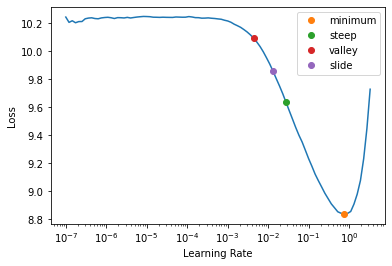

In [23]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [24]:
#Using fit_one_cycle with our Learner will train only the new random embeddings(words that are in our Twitter vocab but not the Wikipedia vocab) in the last layer of the neural network
learn.fit_one_cycle(1, 3e-2)

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.355404,5.156950,0.280656,173.634064,49:22


C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.0002290867705596611)

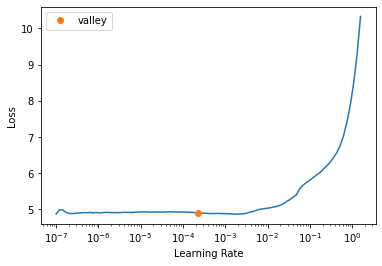

In [25]:
learn.unfreeze()
learn.lr_find()

In [26]:
learn.fit_one_cycle(4, 1e-3)

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.621958,4.838547,0.323943,126.285751,50:51
1,4.277655,4.572791,0.360545,96.813950,46:15
2,3.906115,4.488529,0.381670,88.990417,46:56
3,3.675332,4.510271,0.384181,90.946426,47:27


In [195]:
# Text generation using the language model
TEXT = "I am going"
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


ValueError: max() arg is an empty sequence

In [28]:
# save the model encoder so we can use it to fine-tune our classifier
learn.save_encoder('finetuned_lm')

In [125]:
#Training a Emotion classifier
dls_clas = DataBlock(
    blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('emotion'),
    splitter=RandomSplitter()
).dataloaders(df_clas, bs=42)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\Naveena\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [126]:
dls_clas.show_batch(max_n=5)

,text,category
0,"xxbos i hav a chance to win $ 10 , $ 100 , $ 1 xxrep 3 xxunk . i was given a free can of $ plant .. have to wait till the plant grow to know if i xxunk xxunk ! ! ? !",anger
1,"xxbos xxup xxunk xxup xxunk xxup slow xxup dance xxup xxunk ' xxup the xxup shit xxup out xxup of xxup my xxup xxunk xxup right xxup now ! xxup get xxup up xxup on xxup this xxup song , xxup pure xxup xxunk xxup xxunk",enthusiasm
2,xxbos i am soo happy ! xxmaj but frustrated at the same time ! xxunk : xxunk xxmaj ohh xxunk xxrep 3 ! xxmaj xxunk is recording her new video for xxmaj radar xxrep 3 ! s xxrep 3 o xxunk xxrep 3 !,happiness
3,"xxbos xxmaj umm . xxmaj what do we have here ? xxmaj apple pie , check . xxmaj xxunk , check . xxmaj green tea , check . xxmaj coffee , check . xxmaj then we 're ready for tea time",relief
4,"xxbos xxunk xxmaj yes , but xxmaj i 'm quite xxunk . xxmaj i 'm hoping to get back to it and & ' tune up & ' my skills . xxmaj tim plays xxunk . xxmaj we threaten xxunk .",enthusiasm


In [127]:
#Initialising the Learner is similar to before, but in this case we want a text_classifier_learner
learn = text_classifier_learner(dls_clas, AWD_LSTM,drop_mult=0.6, metrics=accuracy).to_fp16()

C:\Users\Naveena\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [128]:
learn = learn.load_encoder('finetuned_lm')

In [129]:
learn.fit_one_cycle(1, 3e-2)

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,2.164679,2.063866,0.113636,00:18


In [130]:
#Fine-tuning the classifier
#learn.fit_one_cycle(1, 2e-2)

In [131]:
#Now freeze all but the last two layers
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,2.015656,2.036690,0.176136,00:20


In [132]:
#Now all but the last three
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.845352,2.031529,0.164773,00:36


In [133]:
#Lastly unfreeze the entire model and train a bit more
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.747290,2.018289,0.176136,00:55
1,1.698200,2.021532,0.176136,00:54


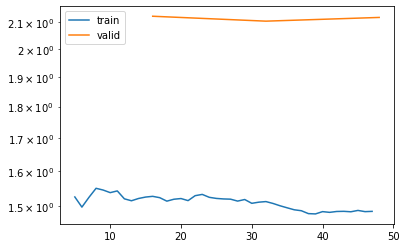

In [38]:
learn.recorder.plot_loss()
plt.yscale('log')

In [134]:
print(learn.recorder.loss)

In [135]:
#Save the classifier
learn.save('classifier')

Path('models/classifier.pth')

In [136]:
learn.predict("surprising to feel")

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('relief',
 TensorText(4),
 TensorText([0.1052, 0.1235, 0.2410, 0.0654, 0.2501, 0.0292, 0.0939, 0.0917]))

In [137]:
learn.predict("especially when it is an appt for my kids")

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('worry',
 TensorText(7),
 TensorText([0.1190, 0.1956, 0.0578, 0.1100, 0.1791, 0.0644, 0.0749, 0.1990]))

In [193]:
learn.predict("Impacts of Coronavirus is becoming manageable")

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('relief',
 TensorText(4),
 TensorText([0.0610, 0.0545, 0.1021, 0.2212, 0.3065, 0.0982, 0.0427, 0.1138]))

In [140]:
pred_dl = dls_clas.test_dl(cor_tweets['text'])

In [141]:
preds = learn.get_preds(dl=pred_dl)

C:\Users\Naveena\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [142]:
# Get predicted sentiment
cor_tweets['emotion'] = preds[0].argmax(dim=-1)
cor_tweets['emotion'] = cor_tweets['emotion'].map({0:'anger', 1:'enthusiasm', 2:'happiness', 3:'hate',4:'relief',5:'sadness',6:'surprise',7:'worry'})

# Convert dates
#cor_tweets['Datetime'] = pd.to_datetime(cor_tweets['Datetime'], errors='coerce').dt.date

# Save to csv
cor_tweets.to_csv('covid19_tweets_emotion_75k.csv')

In [143]:
final_emotion=pd.read_csv('covid19_tweets_emotion_75k.csv')

In [144]:
final_emotion.head(10)

,Unnamed: 0,text,emotion
0,0,mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus,worry
1,1,dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy,hate
2,2,californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules,hate
3,3,pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past,relief
4,4,not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything,sadness
5,5,victoria reported three new locally acquired coronavirus cases taking state outbreak casesa total nine local cases recorded monday included six flagged government daily press conference yesterday,relief
6,6,mr sylvester head housing options bristol city council said homelessness surged lockdown biggest rise third coronavirus took toll families relationships,relief
7,7,albay representative jose clemente salceda asked government provide intensive care units icus healthcare support province faces severe wave coronavirus infections read,happiness
8,8,goingnomaduk chrisrugs politicsforali bbcnews aim stars might least catch moon much less polio smallpox pretty good result well done science covid mitigated coronavirus like flu might us good,relief
9,9,victoria reported three new locally acquired coronavirus cases taking state outbreak cases total nine local cases recorded monday included six flagged government daily press conference yesterday guardian,enthusiasm


In [145]:
final_emotion.emotion.value_counts()

happiness     14109
sadness       12914
relief        11862
hate          10028
surprise       7982
anger          7413
worry          6805
enthusiasm     4779
Name: emotion, dtype: int64

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotion', ylabel='count'>

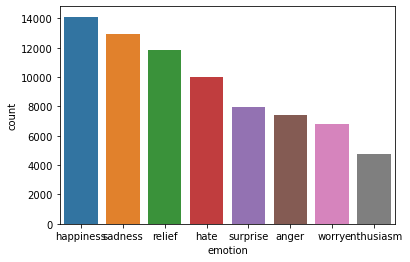

In [146]:
sns.countplot(final_emotion['emotion'],order = final_emotion['emotion'].value_counts(normalize=False).index)

In [152]:
final_emotion['Place'] = data_tweets.Place

In [153]:
final_emotion.head()

,Unnamed: 0,text,emotion,Place
0,0,mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus,worry,East Coast USA
1,1,dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy,hate,Australia
2,2,californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules,hate,San Francisco
3,3,pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past,relief,"Pittsburgh, PA"
4,4,not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything,sadness,"Sydney, New South Wales"


In [154]:
final_emotion.dropna()

,Unnamed: 0,text,emotion,Place
0,0,mostrecent guidance updated last december equal employment opportunity commission said employers legally require workers vaccinated coronavirus,worry,East Coast USA
1,1,dog breakfast aust govt went wrong aged care covid response vic latest outbreak exposes failure fully protect fed run aged care homes woman lost parents coronavirus adds criticism vaccination strategy,hate,Australia
2,2,californians headed campgrounds beaches restaurants long holiday weekend state prepared shed coronavirus rules,hate,San Francisco
3,3,pennsylvania lifted nearly coronavirus restrictions leading memorial day resembling years past,relief,"Pittsburgh, PA"
4,4,not japan cancel games tokyo kept tentative grip coronavirus outbreak could change everything,sadness,"Sydney, New South Wales"
...,...,...,...,...
75882,75882,six employees berks family residential center tested positive coronavirus last two months earlier month center reported first case among detainees,sadness,Philadelphia
75883,75883,fox news year rightwing network promoted coronavirus misinformation estimated times weekday programs course pandemic lies deadly impact,hate,Join your local group
75885,75885,favorite books pt love matters fighting right keeps us loving like jesus jbyas part book launch team thanks zondervan god pandemic christian reflection coronavirus aftermath nt wright,relief,"College Park, MD"
75886,75886,coronavirus spread herd grapevine states may already close herd immunity federalist,anger,"Southwick, MA"


In [157]:
title_emotion = final_emotion.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()

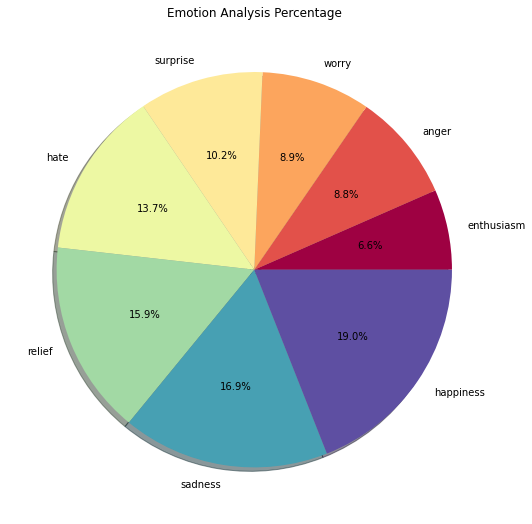

In [168]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

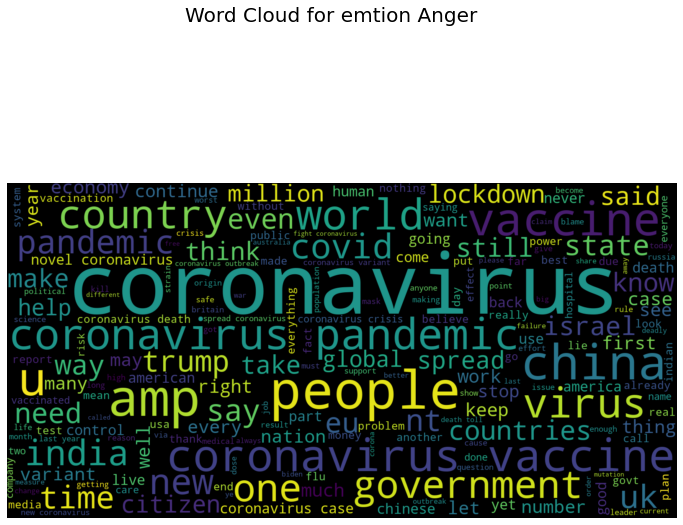

In [199]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'anger']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig = plt.figure(1, figsize=(10,10))
fig.suptitle("Word Cloud for emotion Anger", fontsize=20)
plt.show()

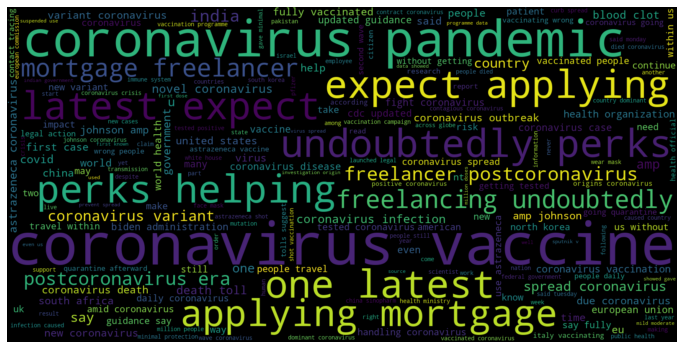

In [172]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'worry']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

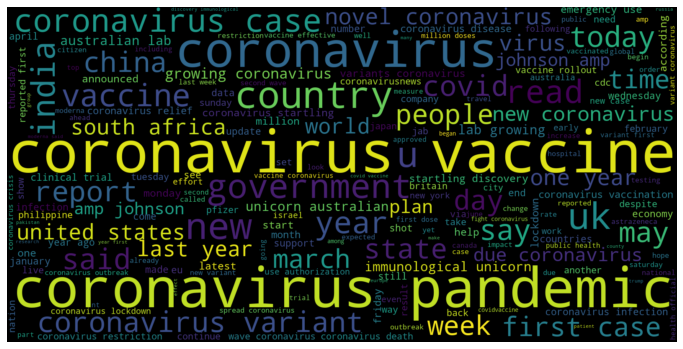

In [173]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'happiness']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

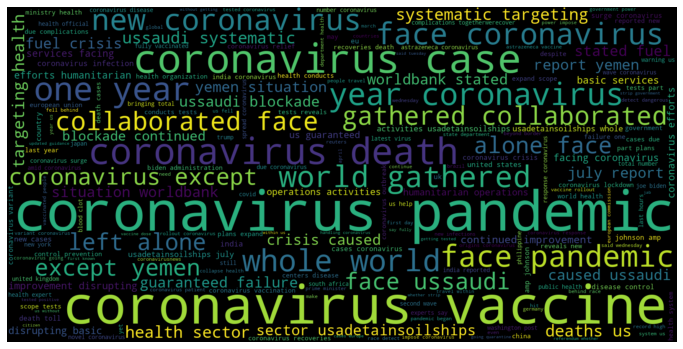

In [174]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'sadness']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

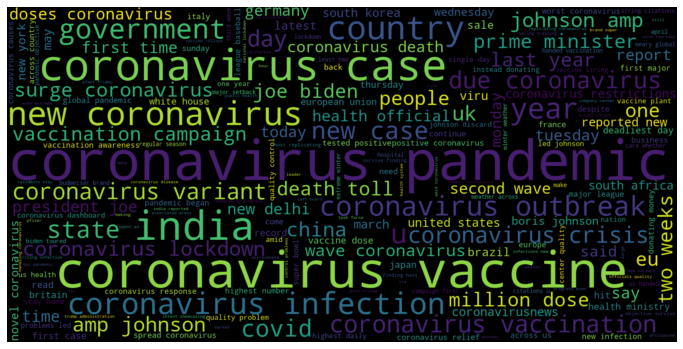

In [175]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'hate']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

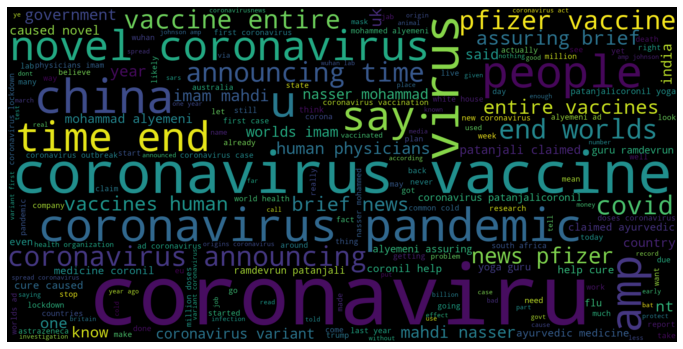

In [176]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'surprise']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

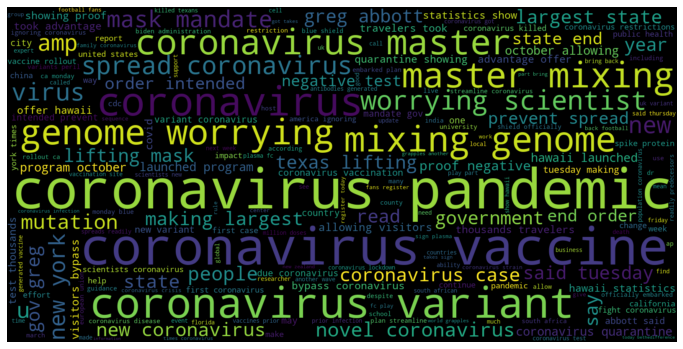

In [177]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'enthusiasm']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

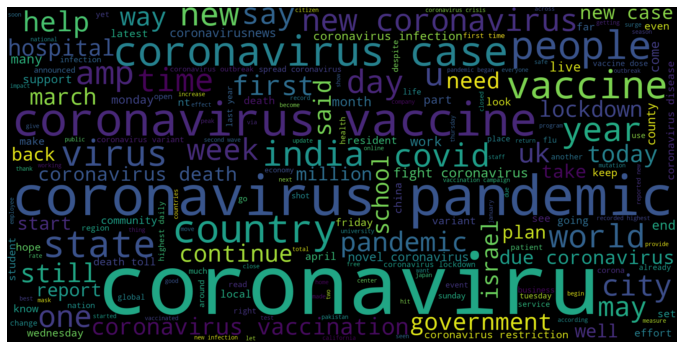

In [178]:
from wordcloud import WordCloud, STOPWORDS
anger_tweets = final_emotion[final_emotion.emotion == 'relief']
neg_string = []
for t in anger_tweets.text:
    neg_string.append(t)
anger_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(anger_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [191]:
'''
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(final_emotion, ['Place', 'emotion']);
'''

"\nfrom statsmodels.graphics.mosaicplot import mosaic\nplt.rcParams['font.size'] = 16.0\nmosaic(final_emotion, ['Place', 'emotion']);\n"

In [203]:
UK_tweets = final_emotion[final_emotion.Place == 'UK']

In [204]:
UK_tweets.head()

,Unnamed: 0,text,emotion,Place
193,193,one problems great british public short attention span even shorter memory anything came boris johnson scrapped cabinet pandemic committee six months coronavirus hit uk,surprise,UK
1545,1545,arrested shooting uk blacklivesmatter activist sasha johnson joebiden ordered intel report origins coronavirus human rights groups want google drop cloudcomputing project saudiarabia amazon bought mgm billion,surprise,UK
1917,1917,lunchtime latest mps ask dfe conduct systematic evaluation coronavirus response read schools headteachers education schoolleaders,sadness,UK
2097,2097,half usa adults fully vaccinated cdc us passed another major milestone tuesday race vaccinate population coronavirus,happiness,UK
2297,2297,amazing real world evidence vaccines actively reducing coronavirus effects virtually nothing usa covid ends mass vaccination low prevalence low hospitalisations amp low deaths,anger,UK


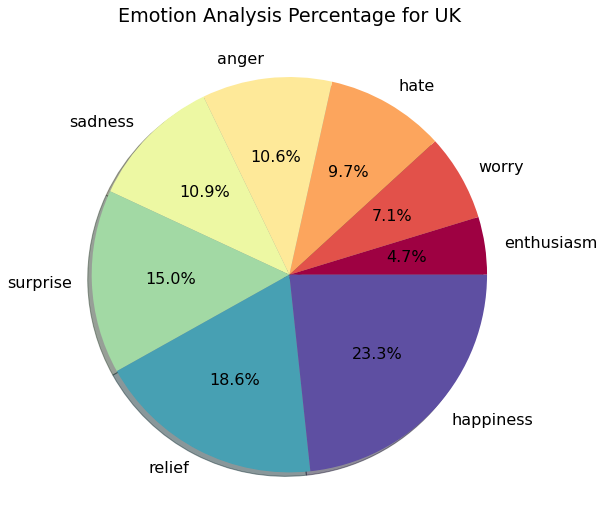

In [206]:
title_emotion = UK_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for UK')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [207]:
Ind_tweets = final_emotion[final_emotion.Place == 'India']

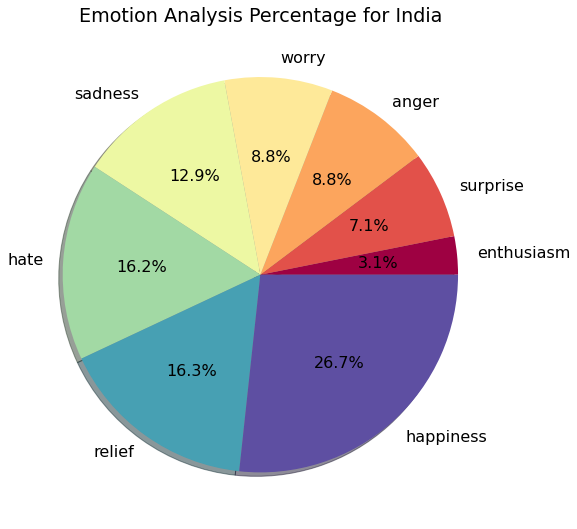

In [211]:
title_emotion = Ind_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for India')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [209]:
US_tweets = final_emotion[final_emotion.Place == 'USA']

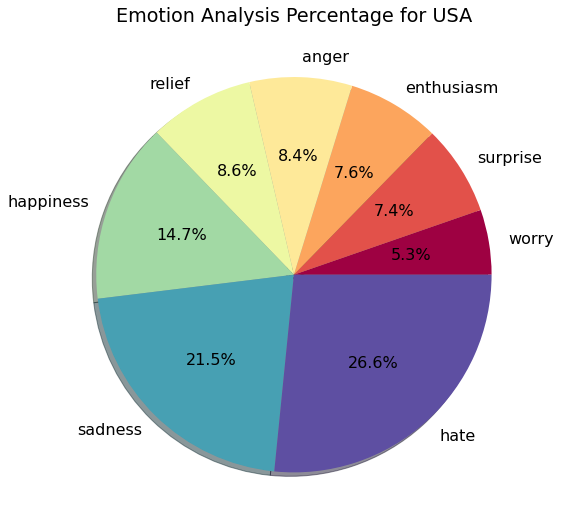

In [210]:
title_emotion = US_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for USA')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [212]:
SA_tweets = final_emotion[final_emotion.Place == 'South Africa']

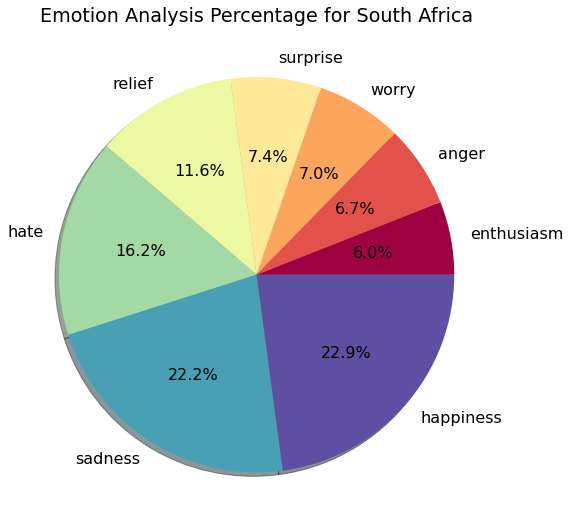

In [214]:
title_emotion = SA_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for South Africa')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [215]:
DU_tweets = final_emotion[final_emotion.Place == 'Dubai']

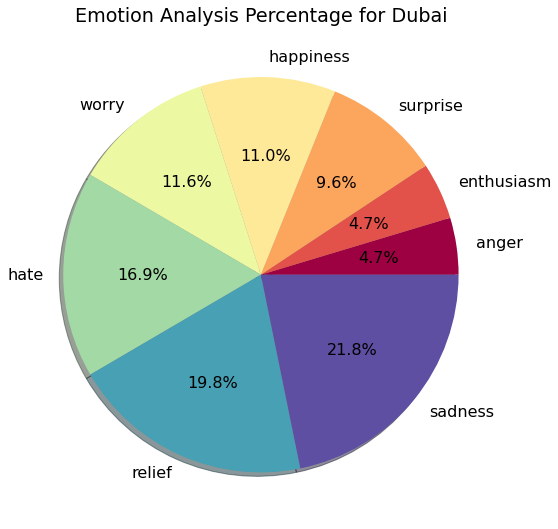

In [216]:
title_emotion = DU_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for Dubai')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [217]:
DU_tweets = final_emotion[final_emotion.Place == 'Tokyo, Japan']

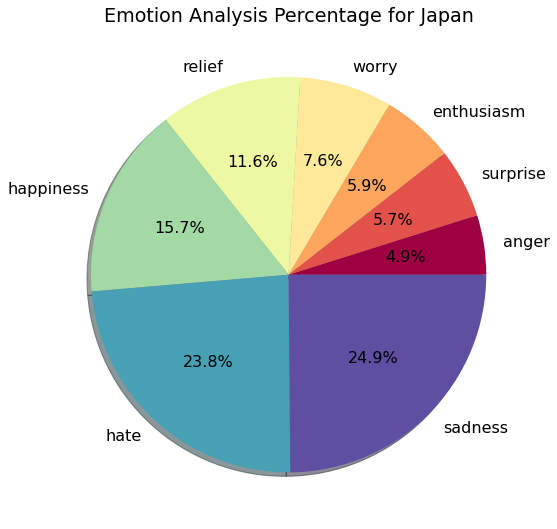

In [219]:
title_emotion = DU_tweets.groupby('emotion').agg('count')
rating_labels = title_emotion.Place.sort_values().index 
rating_counts = title_emotion.Place.sort_values()
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Emotion Analysis Percentage for Japan')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()